In [1]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf


In [3]:
import keras
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Flatten, Activation, Dropout, Conv2D, MaxPooling2D
from keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix


from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from PIL import ImageFile

In [4]:
data_train = 'ECG_DATA/train'
data_test = 'ECG_DATA/test'

In [5]:
batch_size = 10
epochs = 5
img_height = 224
img_width = 224

In [6]:
train_image_generator = ImageDataGenerator(rescale=1./255)  
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,directory=data_train,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 3023 images belonging to 4 classes.


In [7]:
val_image_generator = ImageDataGenerator(rescale=1./255)  
val_data_gen = val_image_generator .flow_from_directory(batch_size=batch_size,directory=data_test,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 928 images belonging to 4 classes.


In [8]:
from keras.applications.mobilenet import MobileNet
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, BatchNormalization
from keras.models import Sequential

In [9]:
base_model=MobileNet( weights='imagenet',include_top=False,input_shape=(224,224,3))

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [10]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D

In [11]:
xception_net = tf.keras.models.Sequential()

xception_net.add(base_model)
xception_net.add(GlobalAveragePooling2D())
xception_net.add(Dense(4, activation = 'softmax'))
xception_net.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional)      │ (None, 7, 7, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │           4,100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,232,964 (12.33 MB)

 Trainable params: 3,211,076 (12.25 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [12]:
xception_net.compile(optimizer= 'adam' , loss= 'categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = xception_net.fit(train_data_gen, epochs=9,
validation_data= val_data_gen,)

Epoch 1/9


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


303/303 ━━━━━━━━━━━━━━━━━━━━ 547s 2s/step - accuracy: 0.7711 - loss: 0.7041 - val_accuracy: 0.9666 - val_loss: 0.1035
Epoch 2/9
303/303 ━━━━━━━━━━━━━━━━━━━━ 417s 1s/step - accuracy: 0.9468 - loss: 0.1652 - val_accuracy: 0.8761 - val_loss: 0.3289
Epoch 3/9
303/303 ━━━━━━━━━━━━━━━━━━━━ 433s 1s/step - accuracy: 0.9547 - loss: 0.1216 - val_accuracy: 0.9741 - val_loss: 0.0796
Epoch 4/9
303/303 ━━━━━━━━━━━━━━━━━━━━ 427s 1s/step - accuracy: 0.9820 - loss: 0.0675 - val_accuracy: 0.9989 - val_loss: 0.0013
Epoch 5/9
303/303 ━━━━━━━━━━━━━━━━━━━━ 428s 1s/step - accuracy: 0.9849 - loss: 0.0517 - val_accuracy: 0.9375 - val_loss: 0.1602
Epoch 6/9
303/303 ━━━━━━━━━━━━━━━━━━━━ 422s 1s/step - accuracy: 0.9915 - loss: 0.0292 - val_accuracy: 0.9688 - val_loss: 0.1389
Epoch 7/9
303/303 ━━━━━━━━━━━━━━━━━━━━ 431s 1s/step - accuracy: 0.9717 - loss: 0.1043 - val_accuracy: 0.9472 - val_loss: 0.1418
Epoch 8/9
303/303 ━━━━━━━━━━━━━━━━━━━━ 388s 1s/step - accuracy: 0.9868 - loss: 0.0403 - val_accuracy: 1.0000 - val

In [14]:
xception_net.save('ecg.h5')

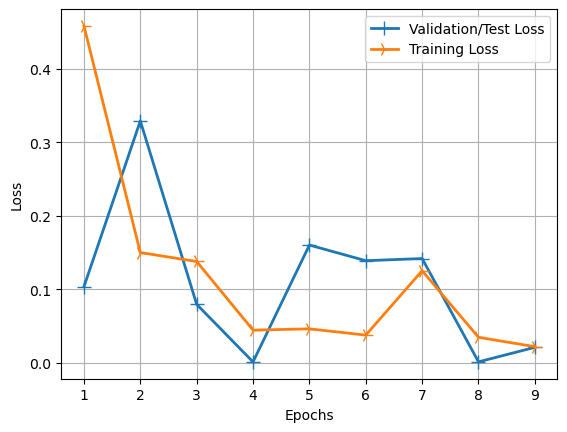

In [15]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

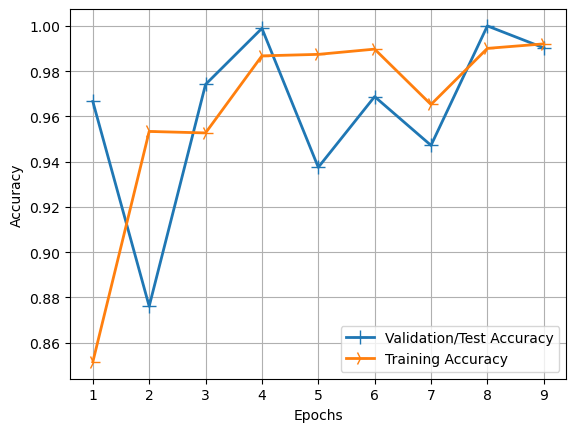

In [16]:
history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [17]:
import numpy as np

y=np.concatenate([val_data_gen.next()[1] for i in range(val_data_gen.__len__())])
true_labels=np.argmax(y, axis=-1)
prediction= xception_net.predict(val_data_gen, verbose=2)
prediction=np.argmax(prediction, axis=-1)

In [23]:
import numpy as np

# Assuming val_data_gen is a DirectoryIterator
y = np.concatenate([next(val_data_gen)[1] for i in range(val_data_gen.__len__())])  # Collecting all true labels
true_labels = np.argmax(y, axis=-1)

# Predicting using the model
prediction = xception_net.predict(val_data_gen, verbose=2)
prediction = np.argmax(prediction, axis=-1)


93/93 - 67s - 719ms/step


In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [25]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=true_labels, y_pred=prediction)

In [26]:
cm_plot_labels = ['Myocardial_Infarction','Abnormal_Heartbeat','History_of_Myocardial_Infarction','Normal_person']

Confusion matrix, without normalization
[[231   0   8   0]
 [  0 172   0   0]
 [  0   1 232   0]
 [  0   0   0 284]]
Accuracy: 0.990
Precision: 0.978
Recall: 0.990
F-Measure: 0.990


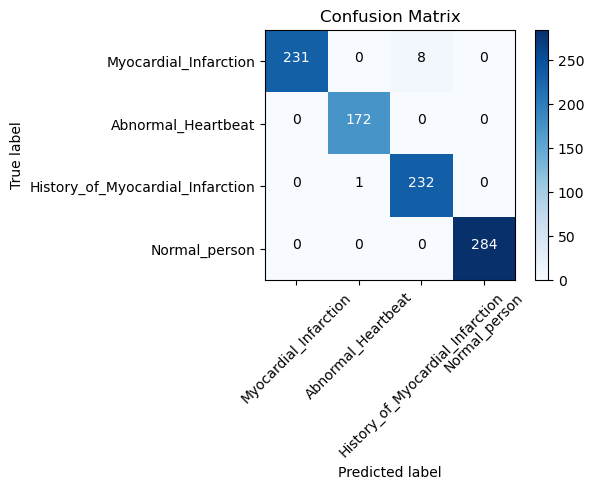

In [27]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
from sklearn.metrics import accuracy_score
acc=accuracy_score(true_labels,prediction) 
print('Accuracy: %.3f' % acc)
from sklearn.metrics import precision_score
precision = precision_score(true_labels,prediction,labels=[1,2], average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
recall = recall_score(true_labels,prediction, average='micro')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(true_labels,prediction, average='micro')
print('F-Measure: %.3f' % score)